## Paris Hilton - Sentiment Analysis

### Sources:

##### https://www.kaggle.com/code/mfaaris/sentiment-using-sklearn-and-tensorflow
##### https://www.kaggle.com/code/emirkocak/in-depth-series-sentiment-analysis-w-transformers
##### https://www.kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn
##### https://www.datacamp.com/tutorial/understanding-logistic-regression-python

In [1]:
# PUT IN TERMINAL FIRST: pip install ntlk

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import libraries (NOTE: nltk may require a pip download)
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#sentiment analysis + model tools 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))
import re
import string
import pickle
from typing import Union, List
from collections import Counter, defaultdict

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

# viz tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

#plotly needs fig_pie.show(renderer='iframe')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('marriott_clean.csv',low_memory=False)

In [6]:
df.head()

Response Date    Survey ID Market Code/Rate Plan Market Segment Check-in Associate (BTR)  Room Rate (derived) Room Number Room Types          Survey language Arrival Date Departure Date Company Name Loyalty Program Tier Mobile Check-In  Intent to Recommend (Property)                                    Overall Comment  Elite Appreciation  Cleanliness  Staff Service  Food and Beverage  Maintenance and Upkeep  Design and Décor  F&B: Service  F&B: Quality of Food Fitness Center Satisfaction  MH: Trusted, quality experience                   Reason for Brand Question Rating                                 Restaurant 1 Name Restaurant 1 Cuisine Type  Restaurant 1 Service Satisfaction:  Restaurant 1 Food Quality Satisfaction: Restaurant 2 Name Restaurant 2 Cuisine Type  Restaurant 2 Service Satisfaction:  Restaurant 2 Food Quality Satisfaction: Other Hotel Restaurant(s) Used                              Restaurants Eaten At      Reason for Trip  Property (Exterior and Interior) Overall  \
0    2/9/24 16:07  2298496229                17BQQC      Transient          RIVERA, RICARDO               184.00         811         PQ                  English      1/29/24         2/2/24  BOOZE ALLEN             Titanium              No                             6.0  Stay was alright, but the shower was scolding ...                 5.0          7.0            7.0                8.0                     7.0               7.0           NaN                   NaN                           5                              7.0                                                NaN                                               NaN                       NaN                                 NaN                                      NaN               NaN                       NaN                                 NaN                                      NaN                            NaN                                               NaN              Meeting                                       NaN   
1     2/9/24 4:56  2301780802                   NaN            NaN                      NaN                  NaN         NaN        NaN                  English          NaN            NaN          NaN                  NaN             NaN                             NaN                                                NaN                 NaN          NaN            NaN                NaN                     NaN               NaN           NaN                   NaN                         NaN                              NaN                                                NaN                                               NaN                       NaN                                 NaN                                      NaN               NaN                       NaN                                 NaN                                      NaN                            NaN                                               NaN                  NaN                                       NaN   
2    2/8/24 23:35  2301535502                   NaN            NaN                      NaN                  NaN         NaN        NaN  English (United States)          NaN            NaN          NaN                  NaN             NaN                             NaN                                                NaN                 NaN          NaN            NaN                NaN                     NaN               NaN           NaN                   NaN                         NaN                              NaN                                                NaN                                               NaN                       NaN                                 NaN                                      NaN               NaN                       NaN                                 NaN                                      NaN                            NaN                                               NaN                  NaN                                       NaN   
3  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0    Response Date                                    22838 non-null  object 
 1   Survey ID                                         22838 non-null  int64  
 2   Market Code/Rate Plan                             14989 non-null  object 
 3   Market Segment                                    14989 non-null  object 
 4   Check-in Associate (BTR)                          14179 non-null  object 
 5   Room Rate (derived)                               14989 non-null  float64
 6   Room Number                                       14989 non-null  object 
 7   Room Types                                        14989 non-null  object 
 8   Survey language                                   22838 non-null  object 
 9   Arrival Date     

In [8]:
df['Overall Score'].describe()

count    22838.000000
mean         4.062114
std          1.206081
min          0.500000
25%          3.500000
50%          4.500000
75%          5.000000
max          5.000000
Name: Overall Score, dtype: float64

In [9]:
df['Overall Score'].value_counts()

Overall Score
5.00    9783
4.00    3713
4.50    2764
3.50    1323
3.00    1229
2.50     749
2.00     685
0.50     668
1.00     610
1.50     408
3.75     141
4.80     114
4.60     104
4.15      87
3.55      81
3.95      69
4.40      69
3.35      59
3.15      50
2.90      29
2.70      19
1.90      16
2.30      16
1.25      14
2.10      14
1.65       6
1.45       5
3.10       3
4.20       2
4.70       2
2.75       1
2.20       1
3.25       1
4.75       1
4.25       1
4.35       1
Name: count, dtype: int64

In [10]:
# convert reviews to .5 values
df['review_score'] = (np.ceil(df['Overall Score'] * 2) / 2)

In [11]:
df['review_date'] = pd.to_datetime(df[' Response Date '], format= '%m/%d/%y %H:%M')

In [12]:
df['review_month_year'] = df['review_date'].dt.to_period('M')

In [13]:
df['review_year'] = df['review_date'].dt.year

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



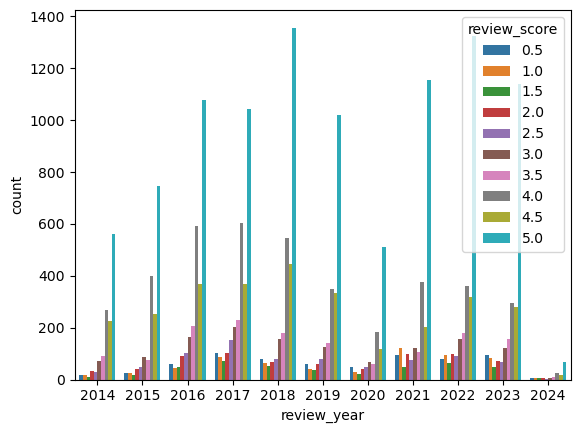

In [14]:
sns.countplot(x="review_year", hue="review_score", data=df);

<Axes: xlabel='review_year'>

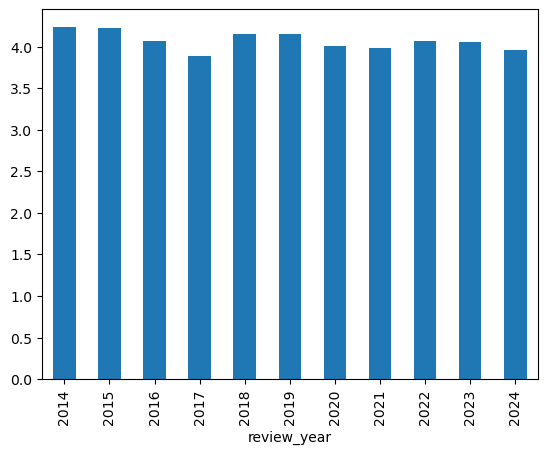

In [15]:
df.groupby("review_year")["review_score"].mean().plot(kind='bar')

In [16]:
# WHEN USING PLOTLY IN JUPYTER NOTEBOOKS YOU NEED THIS IN THE fig.show()
# renderer='iframe'

In [17]:
fig_pie = px.pie(df, values='review_score', names='review_score')
fig_pie.show(renderer='iframe')

## Sentiment Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 93 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0    Response Date                                    22838 non-null  object        
 1   Survey ID                                         22838 non-null  int64         
 2   Market Code/Rate Plan                             14989 non-null  object        
 3   Market Segment                                    14989 non-null  object        
 4   Check-in Associate (BTR)                          14179 non-null  object        
 5   Room Rate (derived)                               14989 non-null  float64       
 6   Room Number                                       14989 non-null  object        
 7   Room Types                                        14989 non-null  object        
 8   Survey language           

In [19]:
# these are text cleaning functions
class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

In [20]:
# label encode for review labels, assigning positive, negative, neutral
def label_encode(x):
    if x == 0.5 or x == 1 or x == 1.5 or x == 2 or x == 2.5:
        return 0
    if x == 3 or x == 3.5:
        return 1
    if x == 5 or x == 4.5 or x==4:
        return 2
    
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [21]:
# make new df for just text
df2 = df.filter(['review_score','Overall Comment','Social Comment'], axis=1)

In [22]:
df2.head()

Overall Comment                                     Social Comment  review_score
0  Stay was alright, but the shower was scolding ...                                                NaN           3.0
1                                                NaN  My boyfriend had gotten us a room here after a...           1.0
2                                                NaN  We were very comfortable during our stay. The ...           5.0
3  Clean comfortable room, very friendly and help...                                                NaN           5.0
4  I checked in and the room I was not able to ge...                                                NaN           2.0

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22838 entries, 0 to 22837
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Comment  8939 non-null   object 
 1   Social Comment   7169 non-null   object 
 2   review_score     22838 non-null  float64
dtypes: float64(1), object(2)
memory usage: 535.4+ KB


In [24]:
df2['Social Comment'].value_counts().head(20)

Social Comment
No comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            517
This guest did not leave comments about this hotel.                                                                                                                                                                                                                                                                                                                            

In [25]:
# some values in Social Comment were "no comment" etc, so I wanted to remove these
df2 = df2[~df2['Social Comment'].isin(['No comment','This guest did not leave comments about this hotel.','This guest did not leave a comment.'])]

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22239 entries, 0 to 22836
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Comment  8939 non-null   object 
 1   Social Comment   6570 non-null   object 
 2   review_score     22239 non-null  float64
dtypes: float64(1), object(2)
memory usage: 695.0+ KB


In [27]:
# new text column to combine the two review text sections
df2['text'] = df2['Overall Comment'].fillna('') + df2['Social Comment'].fillna('')

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22239 entries, 0 to 22836
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Comment  8939 non-null   object 
 1   Social Comment   6570 non-null   object 
 2   review_score     22239 non-null  float64
 3   text             22239 non-null  object 
dtypes: float64(1), object(3)
memory usage: 868.7+ KB


In [29]:
df2.head(20)

Overall Comment                                     Social Comment  review_score                                               text
0   Stay was alright, but the shower was scolding ...                                                NaN           3.0  Stay was alright, but the shower was scolding ...
1                                                 NaN  My boyfriend had gotten us a room here after a...           1.0  My boyfriend had gotten us a room here after a...
2                                                 NaN  We were very comfortable during our stay. The ...           5.0  We were very comfortable during our stay. The ...
3   Clean comfortable room, very friendly and help...                                                NaN           5.0  Clean comfortable room, very friendly and help...
4   I checked in and the room I was not able to ge...                                                NaN           2.0  I checked in and the room I was not able to ge...
5   The room was dirty upon arrival, hair and dust...                                                NaN           1.5  The room was dirty upon arrival, hair and dust...
6                                                 NaN                                                NaN           4.5                                                   
7          Always a pleasant stay. Staff is terrific!                                                NaN           5.0         Always a pleasant stay. Staff is terrific!
8                       Like this hotel and location.                                                NaN           4.5                      Like this hotel and location.
9                                     excellent stay.                                                NaN           5.0                                    excellent stay.
10  Everything was great except a sink that didn’t...                                                NaN           4.0  Everything was great except a sink that didn’t...
11                                                NaN                                                NaN           3.5                                                   
12                                                NaN  POSITIVE:\n\nClean. Comfortable. Staff courteo...           4.5  POSITIVE:\n\nClean. Comfortable. Staff courteo...
13  Hotel and staff are very nice. Only problem wa...                                                NaN           4.0  Hotel and staff are very nice. Only problem wa...
14                                                NaN                                                NaN           5.0                                                   
15  I unfortunately did not have a relaxing stay a...                                                NaN           1.5  I unfortunately did not have a relaxing stay a...
16  Arrival was fine.  Person on the front desk wa...                                                NaN           4.0  Arrival was fine.  Person on the front desk wa...
17                                                NaN  The room was comfortable and clean.  The bathr...           4.0  The room was comfortable and clean.  The bathr...
18  First Marriot I was Disappointed. Went to our ...                                                NaN           2.0  First Marriot I was Disappointed. Went to our ...
19  First time staying at this property. Good expe...                                                NaN           4.0  First time staying at this property. Good expe...

In [30]:
#removing reviews no text in them
df2['text'].replace('', np.nan, inplace=True)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22239 entries, 0 to 22836
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Comment  8939 non-null   object 
 1   Social Comment   6570 non-null   object 
 2   review_score     22239 non-null  float64
 3   text             15509 non-null  object 
dtypes: float64(1), object(3)
memory usage: 868.7+ KB


In [32]:
# removing all reviews that do not have a text comment associated with it
df2.dropna(subset=['text'], inplace=True)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 0 to 22836
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall Comment  8939 non-null   object 
 1   Social Comment   6570 non-null   object 
 2   review_score     15509 non-null  float64
 3   text             15509 non-null  object 
dtypes: float64(1), object(3)
memory usage: 605.8+ KB


In [34]:
#dropping original text comments
df2.drop('Overall Comment', axis=1, inplace=True)
df2.drop('Social Comment', axis=1, inplace=True)

In [35]:
df2.head()

review_score                                               text
0           3.0  Stay was alright, but the shower was scolding ...
1           1.0  My boyfriend had gotten us a room here after a...
2           5.0  We were very comfortable during our stay. The ...
3           5.0  Clean comfortable room, very friendly and help...
4           2.0  I checked in and the room I was not able to ge...

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 0 to 22836
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_score  15509 non-null  float64
 1   text          15509 non-null  object 
dtypes: float64(1), object(1)
memory usage: 363.5+ KB


In [37]:
fig = px.histogram(df2,
             x = 'review_score',
             title = 'Histogram of Review Scores',
             template = 'ggplot2',
             color = 'review_score',
             color_discrete_sequence= px.colors.sequential.Greens_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show(renderer='iframe')

In [38]:
# encode label and mapping label name
df2['label'] = df2['review_score'].apply(lambda x: label_encode(x))
df2['label_name'] = df2['label'].apply(lambda x: label2name(x))

In [39]:
# clean text, lowercase and remove punk
df2['text_clean'] = df2['text'].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

In [40]:
df2.head()

review_score                                               text  label label_name                                         text_clean
0           3.0  Stay was alright, but the shower was scolding ...      1    Neutral  stay was alright  but the shower was scolding ...
1           1.0  My boyfriend had gotten us a room here after a...      0   Negative  my boyfriend had gotten us a room here after a...
2           5.0  We were very comfortable during our stay. The ...      2   Positive  we were very comfortable during our stay  the ...
3           5.0  Clean comfortable room, very friendly and help...      2   Positive  clean comfortable room  very friendly and help...
4           2.0  I checked in and the room I was not able to ge...      0   Negative  i checked in and the room i was not able to ge...

In [41]:
# wordcloud function
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

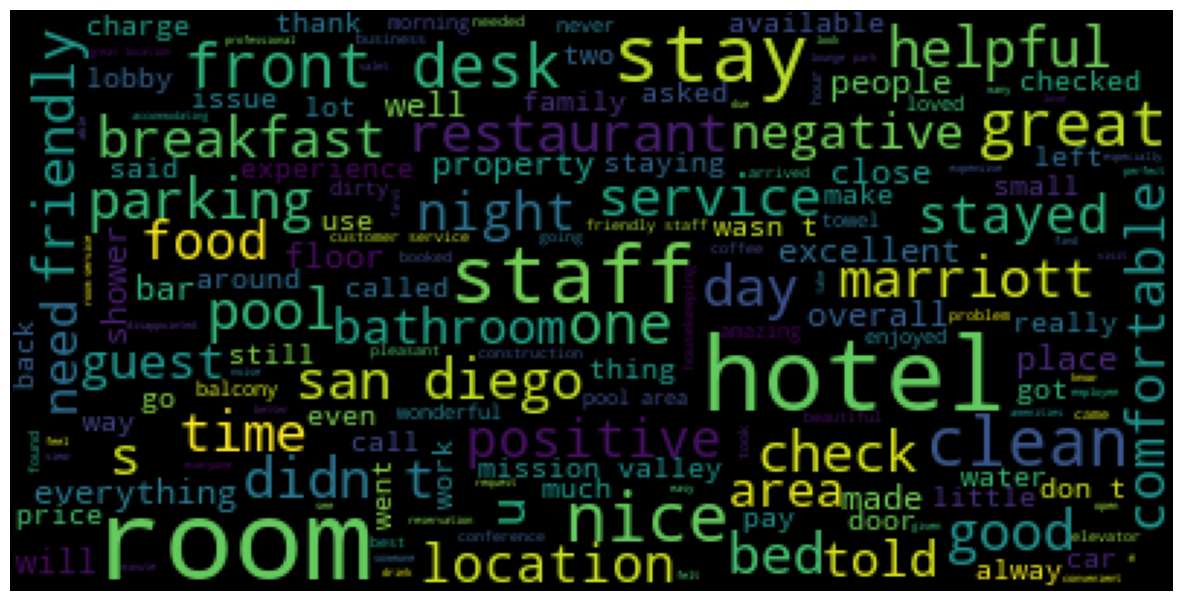

In [42]:
show_wordcloud(df2['text_clean'].values)

In [43]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['lightgreen', 'lightcoral', 'lightblue'] # darkorange
fig.add_trace(go.Pie(labels=df2.label_name.value_counts().index,
                             values=df2.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df2.label_name.value_counts().index, y=df2.label.value_counts().values, marker_color = colors), 1,2)

fig.show(renderer='iframe')

In [44]:
# when I did this analysis first, I saw that these words were very common, they are not helpful to our review
#df2['text_clean'] = df2['text_clean'].str.replace('room','').str.replace('stay','').str.replace('hotel','')

In [45]:
# tokenize data
df2["tokenized_review"] = df2.text_clean.apply(lambda x: tokenize(x))
# calculate token count for any sent
df2["sent_token_length"] = df2["tokenized_review"].apply(lambda x: len(x.split()))

In [46]:
# remove stopwords from text for specialized analysis
df2['text_nostop'] = df2['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords_nltk)]))
df2["tokenized_review_nostop"] = df2.text_nostop.apply(lambda x: tokenize(x))

In [47]:
df2.loc[2,'text']

'We were very comfortable during our stay. The desk staff was incredible. Friendly, helpful, and very very sweet.'

In [48]:
df2.loc[2,'tokenized_review']

'we were very comfortable during our stay the desk staff was incredible friendly helpful and very very sweet'

In [49]:
df2.loc[2,'tokenized_review_nostop']

'comfortable stay desk staff incredible friendly helpful sweet'

In [50]:
fig = px.histogram(df2, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show(renderer='iframe')

In [51]:
(df2.sent_token_length < 250).mean()

0.9820104455477465

In [52]:
# finds char count for each review
df2['char_count'] = df2['text_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 0 to 22836
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_score             15509 non-null  float64
 1   text                     15509 non-null  object 
 2   label                    15509 non-null  int64  
 3   label_name               15509 non-null  object 
 4   text_clean               15509 non-null  object 
 5   tokenized_review         15509 non-null  object 
 6   sent_token_length        15509 non-null  int64  
 7   text_nostop              15509 non-null  object 
 8   tokenized_review_nostop  15509 non-null  object 
 9   char_count               15509 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [54]:
df2.head()

review_score                                               text  label label_name                                         text_clean                                   tokenized_review  sent_token_length                                        text_nostop                            tokenized_review_nostop  char_count
0           3.0  Stay was alright, but the shower was scolding ...      1    Neutral  stay was alright  but the shower was scolding ...  stay was alright but the shower was scolding h...                111  stay alright shower scolding hot get cool told...  stay alright shower scolding hot get cool told...         524
1           1.0  My boyfriend had gotten us a room here after a...      0   Negative  my boyfriend had gotten us a room here after a...  my boyfriend had gotten us a room here after a...                116  boyfriend gotten us room nonstop 22 hour car r...  boyfriend gotten us room nonstop 22 hour car r...         550
2           5.0  We were very comfortable during our stay. The ...      2   Positive  we were very comfortable during our stay  the ...  we were very comfortable during our stay the d...                 18  comfortable stay desk staff incredible friendl...  comfortable stay desk staff incredible friendl...         112
3           5.0  Clean comfortable room, very friendly and help...      2   Positive  clean comfortable room  very friendly and help...  clean comfortable room very friendly and helpf...                 23  clean comfortable room friendly helpful staff ...  clean comfortable room friendly helpful staff ...         135
4           2.0  I checked in and the room I was not able to ge...      0   Negative  i checked in and the room i was not able to ge...  i checked in and the room i was not able to ge...                146  checked room able get 80 degrees several days ...  checked room able get 80 degrees several days ...         738

/tmp/ipykernel_304/1297829534.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



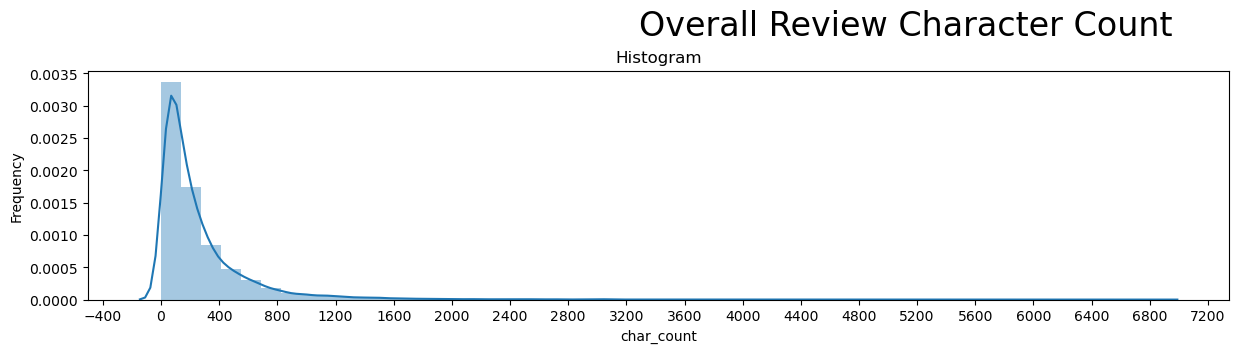

In [55]:
plot_dist3(df2, 'char_count',
           'Overall Review Character Count')

In [56]:
# Creating a new feature for the visualization.
df2['Character Count'] = df2['text_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

/tmp/ipykernel_304/2999389183.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_304/2999389183.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

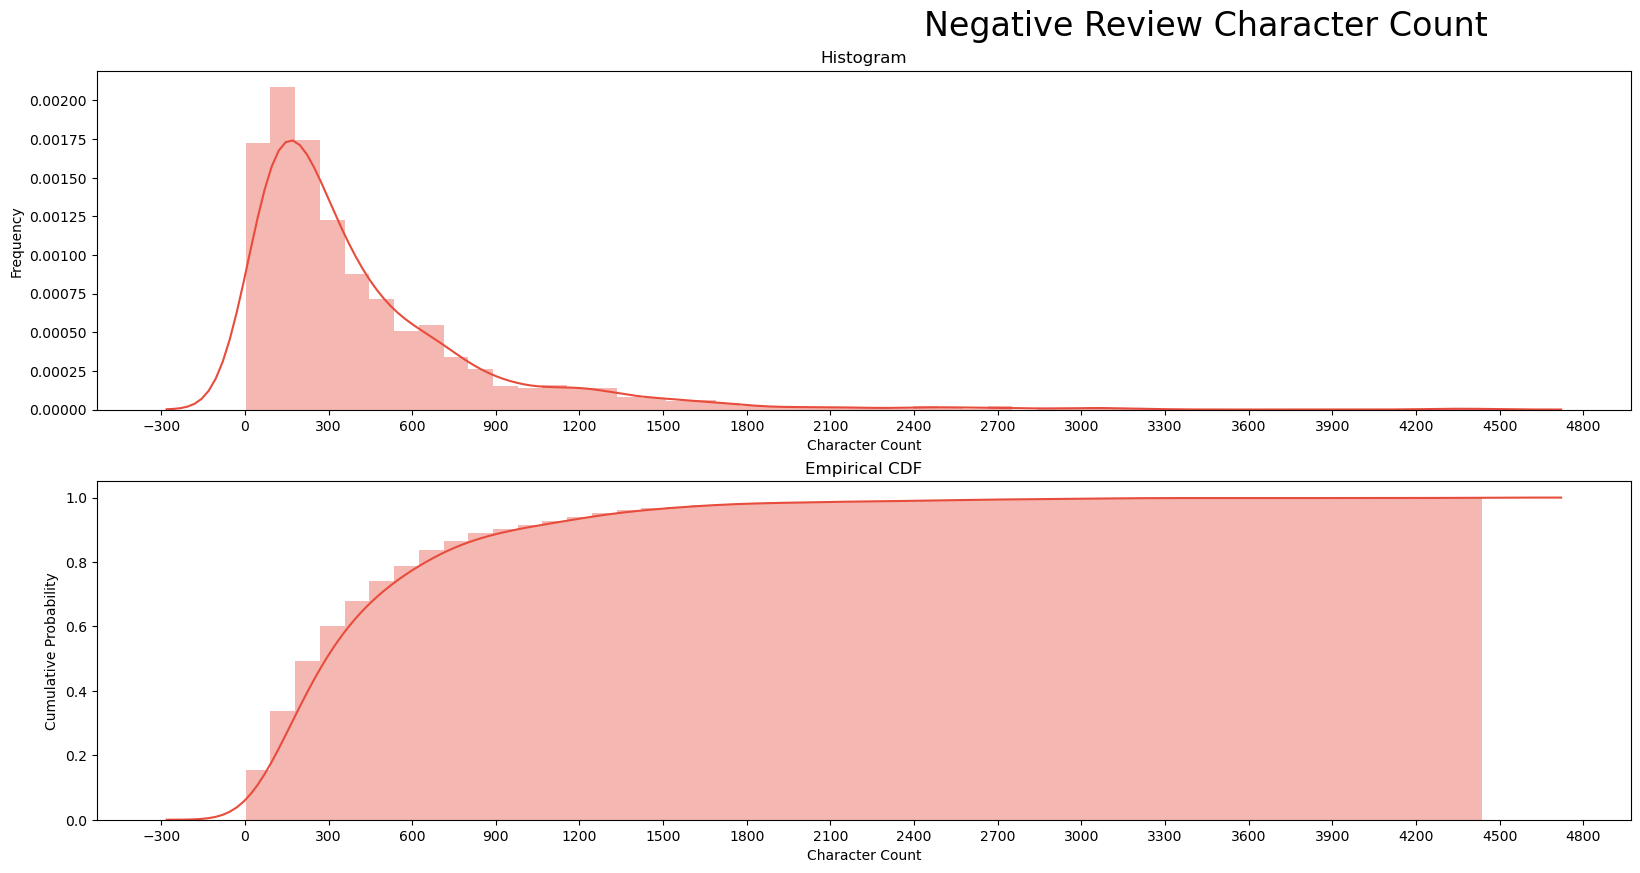

In [57]:
plot_dist3(df2[df2['label'] == 0], 'Character Count',
           'Negative Review Character Count')

/tmp/ipykernel_304/2999389183.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_304/2999389183.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

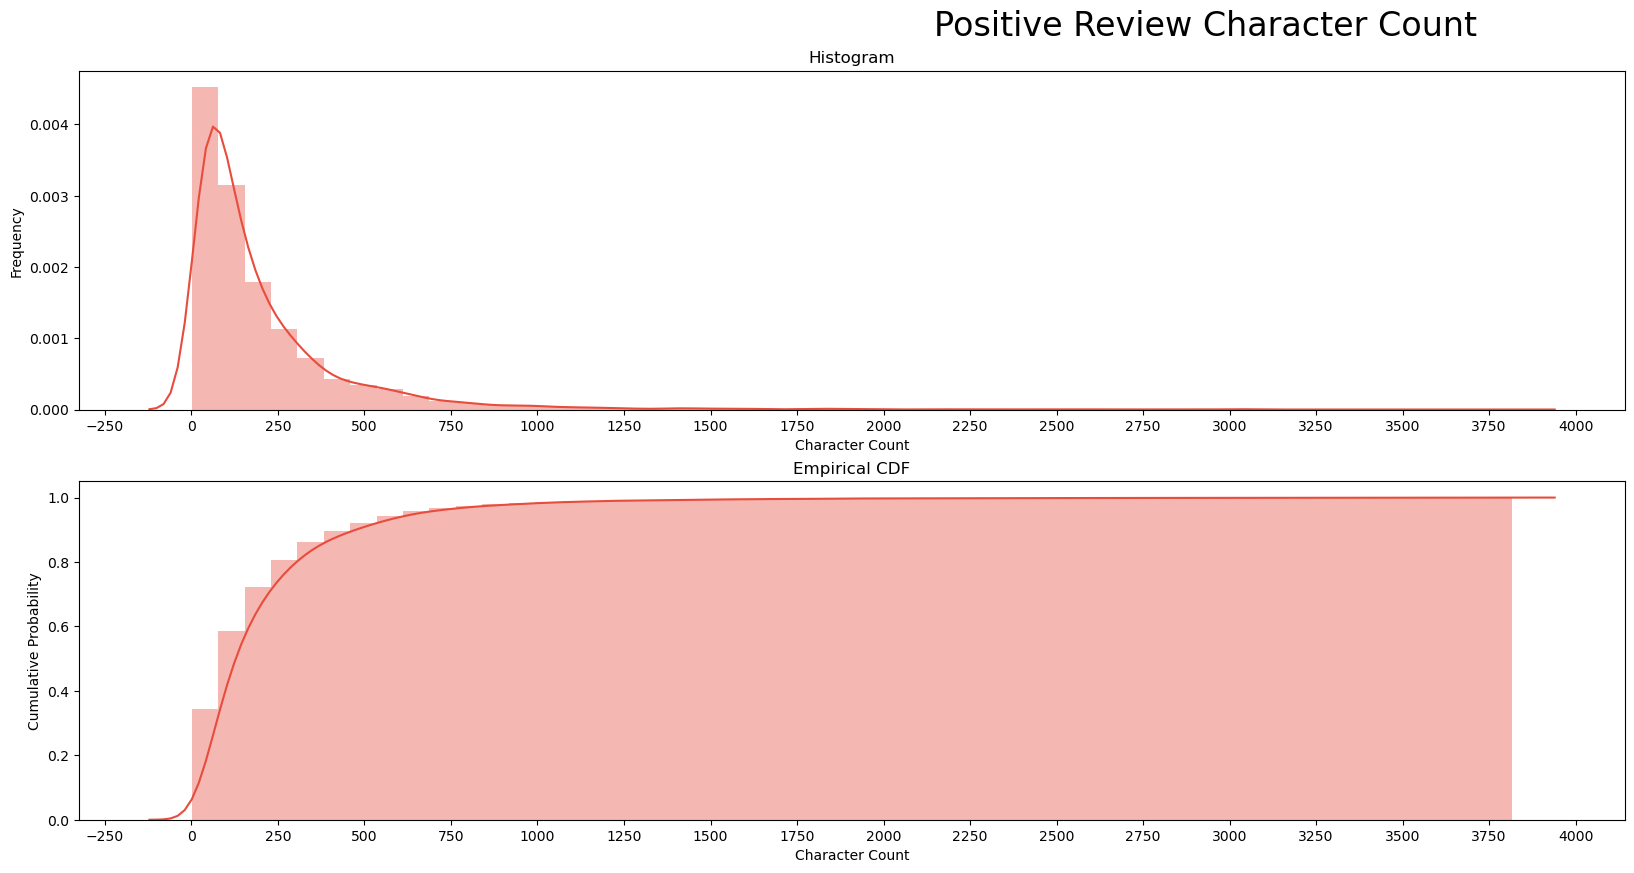

In [58]:
plot_dist3(df2[df2['label'] == 2], 'Character Count',
           'Positive Review Character Count')

/tmp/ipykernel_304/2999389183.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_304/2999389183.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

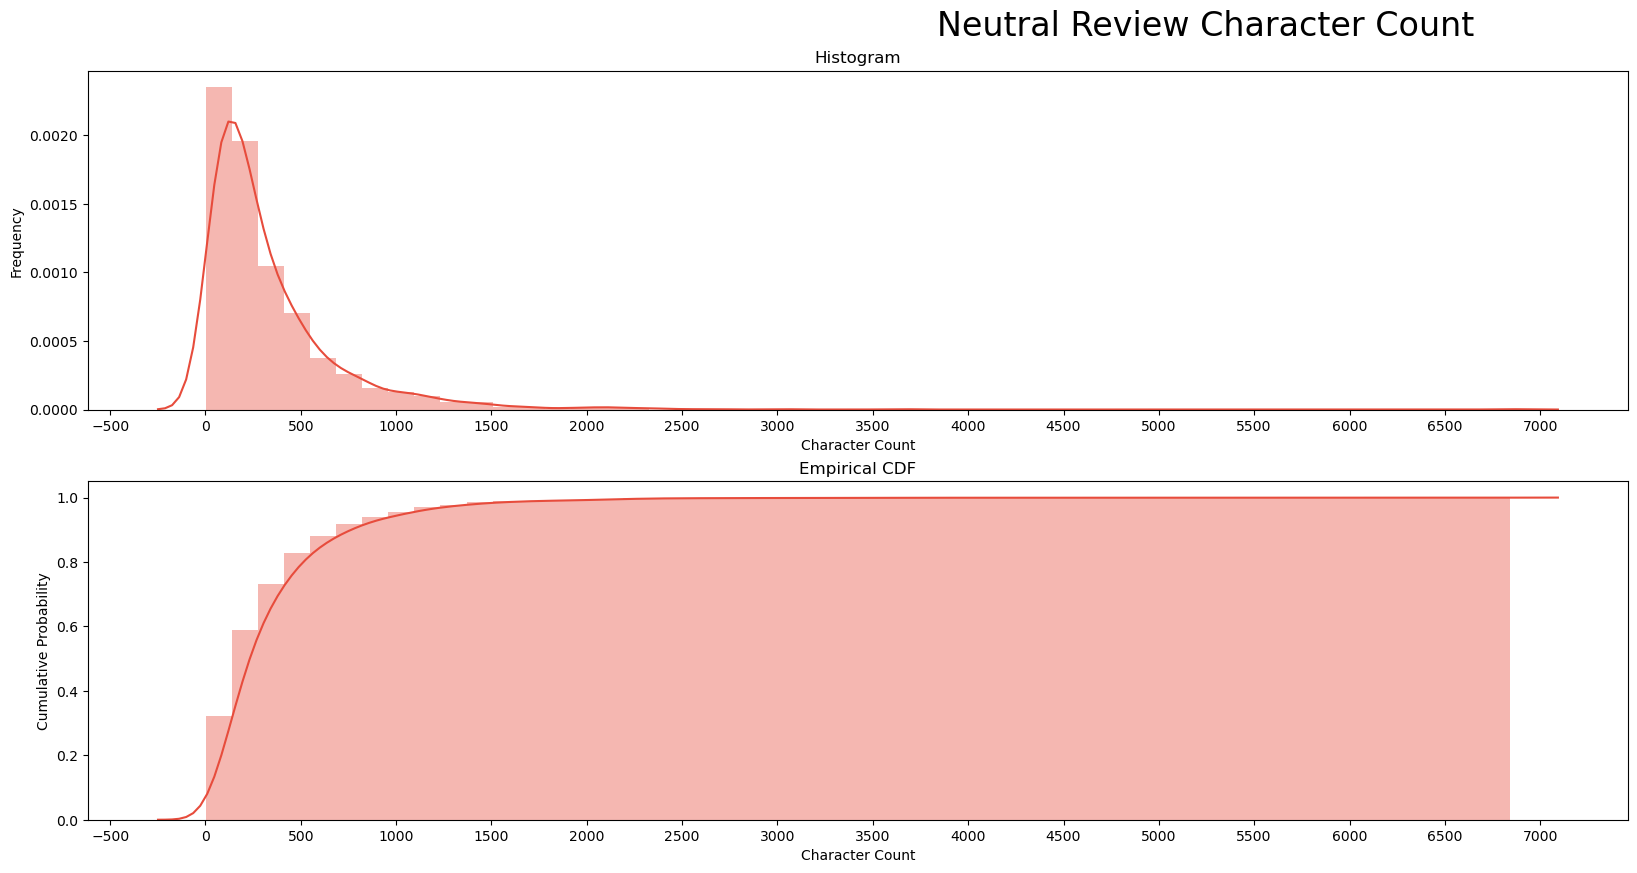

In [59]:
plot_dist3(df2[df2['label'] == 1], 'Character Count',
           'Neutral Review Character Count')

In [60]:
#compare word counts for each type of review to each other
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Neutral')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('Positive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

/tmp/ipykernel_304/1850259404.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_304/1850259404.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

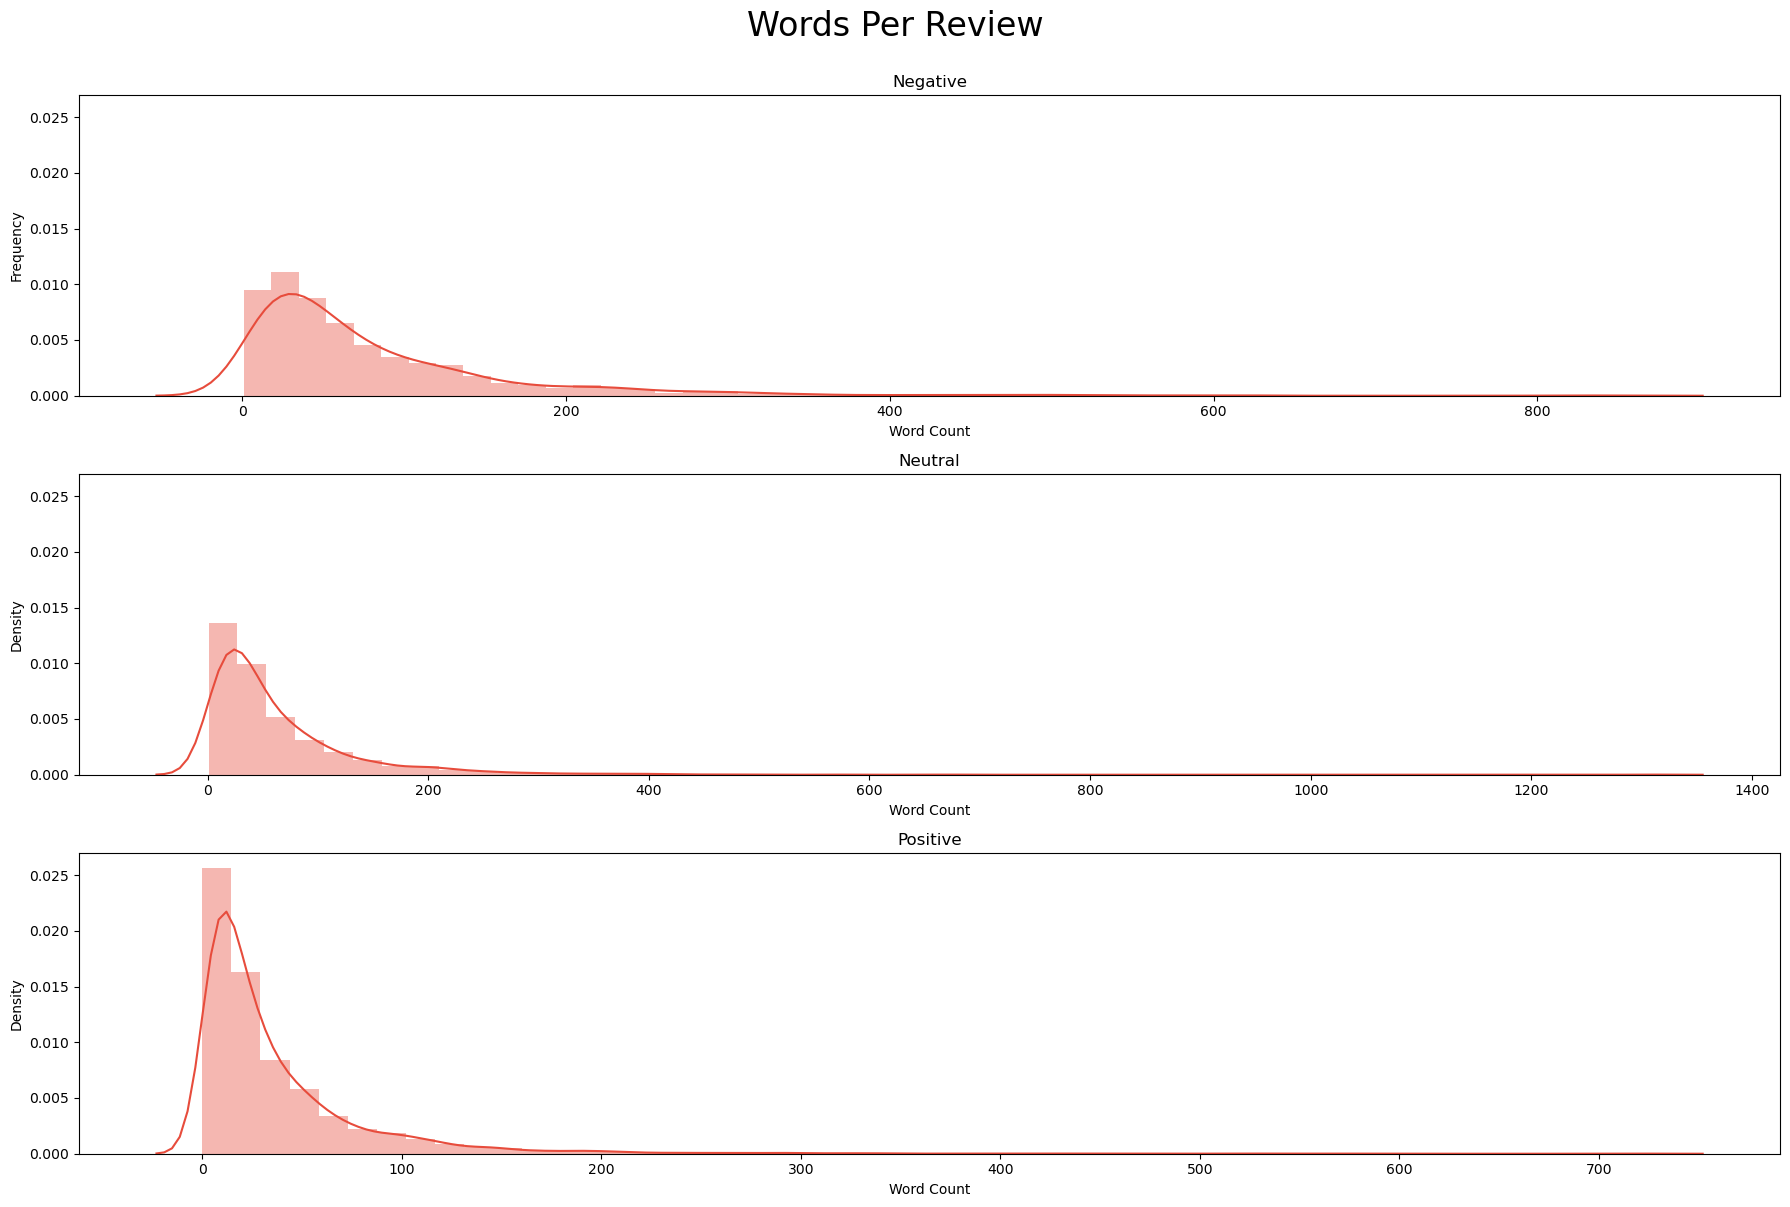

In [61]:
plot_word_number_histogram(df2[df2['label'] == 0]['text_clean'],
                           df2[df2['label'] == 1]['text_clean'],
                           df2[df2['label'] == 2]['text_clean'],
                          )

In [62]:
# remove punk
df2['tokenized_review'] = df2['tokenized_review'].apply(lambda x: remove_punct(x))

In [63]:
texts = df2['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show(renderer='iframe')

In [64]:
fig = make_subplots(rows=1, cols=3)
title_ = ["Negative", "Neutral", "Positive"]
colors = ['lightcoral', 'lightblue','lightgreen']

for i in range(3):
    texts = df2[df2["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:40]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show(renderer='iframe')

In [65]:
df2.head()

review_score                                               text  label label_name                                         text_clean                                   tokenized_review  sent_token_length                                        text_nostop                            tokenized_review_nostop  char_count  Character Count
0           3.0  Stay was alright, but the shower was scolding ...      1    Neutral  stay was alright  but the shower was scolding ...  stay was alright but the shower was scolding h...                111  stay alright shower scolding hot get cool told...  stay alright shower scolding hot get cool told...         524              524
1           1.0  My boyfriend had gotten us a room here after a...      0   Negative  my boyfriend had gotten us a room here after a...  my boyfriend had gotten us a room here after a...                116  boyfriend gotten us room nonstop 22 hour car r...  boyfriend gotten us room nonstop 22 hour car r...         550              550
2           5.0  We were very comfortable during our stay. The ...      2   Positive  we were very comfortable during our stay  the ...  we were very comfortable during our stay the d...                 18  comfortable stay desk staff incredible friendl...  comfortable stay desk staff incredible friendl...         112              112
3           5.0  Clean comfortable room, very friendly and help...      2   Positive  clean comfortable room  very friendly and help...  clean comfortable room very friendly and helpf...                 23  clean comfortable room friendly helpful staff ...  clean comfortable room friendly helpful staff ...         135              135
4           2.0  I checked in and the room I was not able to ge...      0   Negative  i checked in and the room i was not able to ge...  i checked in and the room i was not able to ge...                146  checked room able get 80 degrees several days ...  checked room able get 80 degrees several days ...         738              738

In [66]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:20]

In [67]:
# Bigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df2[df2["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common Bigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show(renderer='iframe')

In [68]:
# Bigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df2[df2["label"] == i]['tokenized_review_nostop']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common Bigrams per Classes (No Stopwords)</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show(renderer='iframe')

In [69]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df2[df2["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show(renderer='iframe')

In [70]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df2[df2["label"] == i]['tokenized_review_nostop']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes (No Stopwords)</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show(renderer='iframe')

In [71]:
df2.head()

review_score                                               text  label label_name                                         text_clean                                   tokenized_review  sent_token_length                                        text_nostop                            tokenized_review_nostop  char_count  Character Count
0           3.0  Stay was alright, but the shower was scolding ...      1    Neutral  stay was alright  but the shower was scolding ...  stay was alright but the shower was scolding h...                111  stay alright shower scolding hot get cool told...  stay alright shower scolding hot get cool told...         524              524
1           1.0  My boyfriend had gotten us a room here after a...      0   Negative  my boyfriend had gotten us a room here after a...  my boyfriend had gotten us a room here after a...                116  boyfriend gotten us room nonstop 22 hour car r...  boyfriend gotten us room nonstop 22 hour car r...         550              550
2           5.0  We were very comfortable during our stay. The ...      2   Positive  we were very comfortable during our stay  the ...  we were very comfortable during our stay the d...                 18  comfortable stay desk staff incredible friendl...  comfortable stay desk staff incredible friendl...         112              112
3           5.0  Clean comfortable room, very friendly and help...      2   Positive  clean comfortable room  very friendly and help...  clean comfortable room very friendly and helpf...                 23  clean comfortable room friendly helpful staff ...  clean comfortable room friendly helpful staff ...         135              135
4           2.0  I checked in and the room I was not able to ge...      0   Negative  i checked in and the room i was not able to ge...  i checked in and the room i was not able to ge...                146  checked room able get 80 degrees several days ...  checked room able get 80 degrees several days ...         738              738

## Model Work

In [72]:
df2.head()

review_score                                               text  label label_name                                         text_clean                                   tokenized_review  sent_token_length                                        text_nostop                            tokenized_review_nostop  char_count  Character Count
0           3.0  Stay was alright, but the shower was scolding ...      1    Neutral  stay was alright  but the shower was scolding ...  stay was alright but the shower was scolding h...                111  stay alright shower scolding hot get cool told...  stay alright shower scolding hot get cool told...         524              524
1           1.0  My boyfriend had gotten us a room here after a...      0   Negative  my boyfriend had gotten us a room here after a...  my boyfriend had gotten us a room here after a...                116  boyfriend gotten us room nonstop 22 hour car r...  boyfriend gotten us room nonstop 22 hour car r...         550              550
2           5.0  We were very comfortable during our stay. The ...      2   Positive  we were very comfortable during our stay  the ...  we were very comfortable during our stay the d...                 18  comfortable stay desk staff incredible friendl...  comfortable stay desk staff incredible friendl...         112              112
3           5.0  Clean comfortable room, very friendly and help...      2   Positive  clean comfortable room  very friendly and help...  clean comfortable room very friendly and helpf...                 23  clean comfortable room friendly helpful staff ...  clean comfortable room friendly helpful staff ...         135              135
4           2.0  I checked in and the room I was not able to ge...      0   Negative  i checked in and the room i was not able to ge...  i checked in and the room i was not able to ge...                146  checked room able get 80 degrees several days ...  checked room able get 80 degrees several days ...         738              738

In [73]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

In [74]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [75]:
stop=stopwords.words('english')

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

In [77]:
y=df2.label.values
x=tfidf.fit_transform(df2.text_clean)

/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=400).fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [80]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7940038684719536


The ROC (and, therefore, the AUC) may be used only for binary classification.

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7543520309477756


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7491940683430045


In [85]:
from sklearn.linear_model import SGDClassifier
sdg = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                   max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=0, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                   early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
sdg.fit(X_train, y_train)
y_pred = sdg.predict(X_test)

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7998065764023211


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.63      0.57       397
           1       0.44      0.06      0.11       365
           2       0.86      0.94      0.90      2340

    accuracy                           0.80      3102
   macro avg       0.60      0.55      0.52      3102
weighted avg       0.77      0.80      0.76      3102



In [88]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 252,   14,  131],
       [ 122,   22,  221],
       [ 119,   14, 2207]])

''

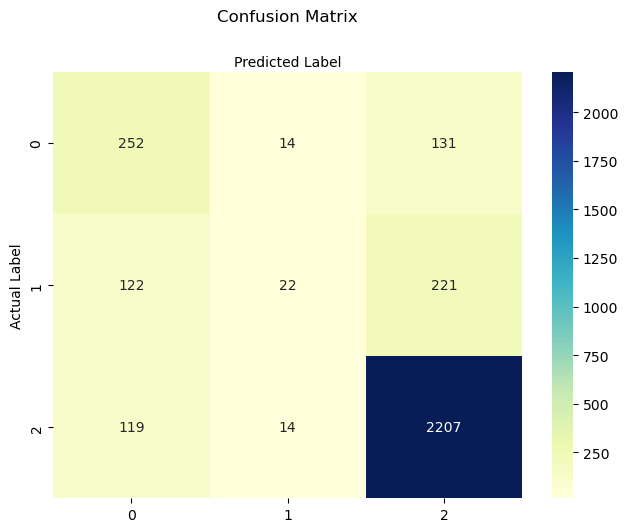

In [89]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

;